In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import astropy.io.fits as fits
from astropy.table import Table
import healpy as hp
import matplotlib.pyplot as plt
import healsparse as hsp
import skyproj
import Config
from GetObjectsSize import *
# from TrainAndFullMapSize import *

In [2]:
minGR = -0.3 # Minimum G-R color
maxGR = 1 # Maximum G-R color
res = 512 # Healpixel resolution
perCovered = 0.6 # Percent of healpixel that must have valid survey properties at the 4096 scale
sigma = 0.5 # Sigma used for gaussian weighting
perVar = 0.98 # Percent of the variance to be captured
perMap = 0.625 # Percent of the PC maps to use, adjust this later
numBins = 100 # Number of points in interpolation
magBins = [20, 22, 23, 24, 25, 26] # G magnitude bins
sizeBins = None

In [3]:
conditions = Config.conditions
likeDir = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/MaximumLikelihoodSize/'
oldGalaDir = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/GalaxyContamination/'

In [4]:
deepFiles = ['/hdfs/bechtol/balrog/y3_deep_fields/y3_deep_fields_catalog/deepfields_000001.fits', 
             '/hdfs/bechtol/balrog/y3_deep_fields/y3_deep_fields_catalog/deepfields_000002.fits', 
             '/hdfs/bechtol/balrog/y3_deep_fields/y3_deep_fields_catalog/deepfields_000003.fits',
             '/hdfs/bechtol/balrog/y3_deep_fields/y3_deep_fields_catalog/deepfields_000004.fits',
             '/hdfs/bechtol/balrog/y3_deep_fields/y3_deep_fields_catalog/deepfields_000005.fits']

In [5]:
detBalrFile = '/hdfs/bechtol/balrog/y3/balrog_detection_catalog_sof_y3-merged_v1.2.fits'
matBalrFile = '/hdfs/bechtol/balrog/y3/balrog_matched_catalog_sof_y3-merged_v1.2.fits'
galaFile = likeDir + 'InjectionData/Galaxies.fits'

In [6]:
detBalrStarFile = '/afs/hep.wisc.edu/bechtol-group/MegansThings/balrog_detection_catalog_sof_run2_stars_v1.4_avg_added_match_flags.fits'
detStarFile = likeDir + 'InjectionData/Det_Stars.fits'

matBalrStarFile = '/afs/hep.wisc.edu/bechtol-group/MegansThings/balrog_matched_catalog_sof_run2_stars_v1.4.fits'
matStarFile = likeDir + 'InjectionData/Mat_Stars.fits'

In [7]:
origCondFiles = Config.files[:-1]
stelFile = Config.files[-1]
# This step was already done in an identical way
pixCondDir = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/MaximumLikelihood/PixAndConds/'
pixFile = pixCondDir + 'Valid_'+str(res)+'_Pixels.fits'
validPix = fitsio.read(pixFile)['PIXEL']
condFiles = []
for cond in conditions:
    condFiles.append(pixCondDir + str(res) + '_' + cond + '.fits')
condFiles = np.array(condFiles)

In [8]:
# getMatStars(minGR, maxGR, matBalrStarFile, detBalrStarFile, matStarFile)

In [9]:
# getDetStar(minGR, maxGR, detBalrStarFile, detStarFile)

In [10]:
# getGalaxies(minGR, maxGR, deepFiles, matBalrFile, detBalrFile, galaFile)

In [11]:
starData = fitsio.read(matStarFile)

In [12]:
size = starData['SIZE']
gmag = starData['GMAG']

In [13]:
import matplotlib.pyplot as plt

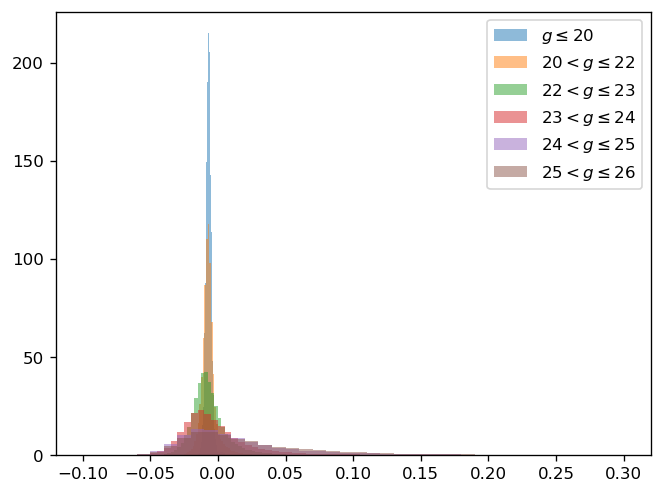

In [14]:
plt.figure(dpi = 120)
plt.hist(size[np.where(gmag <= 20)[0]], bins = np.linspace(-0.015, 0.005, 41), alpha = 0.5, label = r'$g\leq 20$', density = True)
plt.hist(size[np.where((gmag <= 22) & (gmag > 20))[0]], bins = np.linspace(-0.025, 0.025, 41), alpha = 0.5, label = r'$20<g\leq 22$', density = True)
plt.hist(size[np.where((gmag <= 23) & (gmag > 22))[0]], bins = np.linspace(-0.05, 0.05, 41), alpha = 0.5, label = r'$22<g\leq 23$', density = True)
plt.hist(size[np.where((gmag <= 24) & (gmag > 23))[0]], bins = np.linspace(-0.05, 0.15, 41), alpha = 0.5, label = r'$23<g\leq 24$', density = True)
plt.hist(size[np.where((gmag <= 25) & (gmag > 24))[0]], bins = np.linspace(-0.1, 0.3, 41), alpha = 0.5, label = r'$24<g\leq 25$', density = True)
plt.hist(size[np.where((gmag <= 26) & (gmag > 25))[0]], bins = np.linspace(-0.1, 0.3, 41), alpha = 0.5, label = r'$25<g\leq 26$', density = True)
plt.legend()
plt.show()